In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import h5py

## StochKv cells

In [3]:
import os 

rootFolder = '/home/fernando/Downloads/S1_netpyne/'

#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------
# Load 55 Morphological Names-> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names-> L1:14 L23:43 L4:46 L5:52 L6:52

with open(rootFolder + '/info/anatomy/S1-cells-distributions-Rat.txt') as metype_file:
    metype_content = metype_file.read()       

MtypeNumber = {}
MEtypeNumber = {}
MtypePop = []
MEtypePop = []
popLabel = {}
N = 0
for line in metype_content.split('\n')[:-1]:
    metype, mtype, etype, n, m = line.split()
    MEtypeNumber[metype] = int(n)
    popLabel[metype] = mtype
    MtypeNumber[mtype] = int(m)

    if mtype not in MtypePop:
        MtypePop.append(mtype)
    MEtypePop.append(metype)
    
    N = N + int(n)
    
print ('Number of cells = %d' % N)


## https://bbp.epfl.ch/nmc-portal/assets/documents/static/Download/hoc_combos_syn.1_0_10.allzips.tar
## extracted 1035 folders in home/fernando/Downloads/hoc_combos_syn.1_0_10.allzips/  #~ not inclued in the github

StochKvcells = []
nonStochKvcells = []

for cellName in MEtypePop:
    number = 1 # same for all metype cells
    os.chdir('/home/fernando/Downloads/hoc_combos_syn.1_0_10.allzips/'+cellName+'_'+str(number)+'/')
    
    foldermech = os.listdir('mechanisms/')
    if 'StochKv.mod' in foldermech:
        StochKvcells.append(cellName) 
        if 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]] > 25:
            print('%s %s %.0f%s %d %d' % (cellName, '1', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))
#         else:
#             print('%s %s %.0f%s %d %d' % (cellName, '2', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))
    else:
        nonStochKvcells.append(cellName)
#         print('%s %s %.0f%s %d %d' % (cellName, '0', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))


Number of cells = 31346
L4_DBC_bIR215 1 32% 13 40
L4_LBC_cSTUT189 1 25% 31 122
L5_DBC_bIR215 1 35% 34 96
L6_DBC_bIR215 1 32% 10 31
L6_LBC_bIR215 1 27% 127 463
L6_LBC_bSTUT213 1 27% 124 463
L6_MC_bIR215 1 43% 145 336


## All cells

In [9]:
os.chdir('/home/fernando/S1_netpyne/data/v6/')


In [11]:
data = {}
batchNames = ['v6_batch0','v6_batch4']
paramsNameList = ['Spontaneous','S1_Thalamus']

for labelNumber,batchName in enumerate(batchNames):

    paramsName = paramsNameList[labelNumber]
    data[paramsName] = {}
    
    hf = h5py.File(batchName+'/RasterPlot.h5', 'r')
    spkid = np.array(hf.get('spkid'))
    spkt = np.array(hf.get('spkt'))
    hf.close()

    hf = h5py.File(batchName+'/Voltage_soma.h5', 'r') 
    
    cellVNumber = []
    data[paramsName]['V_soma'] = {}    
    
    cellVNumber = []
    for cellName in list(hf.keys()):
        cellVNumber.append(int(cellName.split('_')[1]))
    cellVNumber = np.sort(cellVNumber)   
    
    for cellName in cellVNumber:
        Vt = np.array(hf.get('cell_'+str(cellName)))
        data[paramsName]['V_soma']['cell_'+str(cellName)] = Vt
        
    hf.close()
    
    data[paramsName]['spkid'] = spkid
    data[paramsName]['spkt'] = spkt

In [12]:
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('../../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
popParam = []
cellParam = []
meParamLabels = {} 
popLabelEl = {} 
cellLabel = {}

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

    if mtype not in popParam:
        popParam.append(mtype)
        popLabelEl[mtype] = [] 
               
    popLabelEl[mtype].append(metype)
    
    cellParam.append(mtype + '_' + etype[0:3])
    
S1pops = popParam[0:55]
S1cells = cellParam[0:207]

#------------------------------------------------------------------------------  
# Thalamic Cells

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

cellNumber['ss_RTN_o'] = int(382 * (210**2/150**2)) # from mouse model (d = 150 um)
cellNumber['ss_RTN_m'] = int(382 * (210**2/150**2))
cellNumber['ss_RTN_i'] = int(765 * (210**2/150**2))
cellNumber['VPL_sTC'] = int(656 * (210**2/150**2))
cellNumber['VPM_sTC'] = int(839 * (210**2/150**2))
cellNumber['POm_sTC_s1'] = int(685 * (210**2/150**2))

for mtype in thalamicpops: # No diversity
	metype = mtype
	popParam.append(mtype)
	popLabel[metype] = mtype
	cellParam.append(metype)

	popNumber[mtype] = cellNumber[metype]

	popLabelEl[mtype] = [] 
	popLabelEl[mtype].append(metype)

#------------------------------------------------------------------------------  
popParamLabels = popParam
cellParamLabels = cellParam

In [13]:
popNumber = np.linspace(1, 55, 55)
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

Ipops = []
for popName in popParam:
    if popName not in Epops and popName not in thalamicpops:
        Ipops.append(popName)

In [14]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
allpops = cellParamLabels
cellsrec = 2
if cellsrec == 0:  recordCells = allpops # record all cells
elif cellsrec == 1: recordCells = [(pop,0) for pop in allpops] # record one cell of each pop
elif cellsrec == 2: # record one cell of each cellMEtype # need more test!!!
    recordCells = []
    for metype in cellParamLabels:
        if cellNumber[metype] < 5:
            for numberME in range(cellNumber[metype]):
                recordCells.append((metype,numberME))
        else:
            numberME = 0
            diference = cellNumber[metype] - 5.0*int(cellNumber[metype]/5.0)
            
            for number in range(5):            
                recordCells.append((metype,numberME))
                
                if number < diference:              
                    numberME+=int(np.ceil(cellNumber[metype]/5.0))  
                else:
                    numberME+=int(cellNumber[metype]/5.0)

In [15]:
paramsNameList

['Spontaneous', 'S1_Thalamus']

In [30]:
recordStochKvCells = []
for metype in recordCells:
    for StochKvcell in StochKvcells:
        if metype[0] in StochKvcell:
#             print(metype)
            recordStochKvCells.append(metype[0])

# Spontaneous

In [35]:
printVt = ['L23_LBC','L23_NBC','L4_DBC','L4_NGC','L4_PC','L4_SS','L5_MC','L5_STPC','L5_TTPC2','L6_MC','L6_TPC_L4','L6_UTPC','ss_RTN_i','POm_sTC_s1']
printVt = ['ss_RTN_o','ss_RTN_m','ss_RTN_i','VPL_sTC','VPM_sTC','POm_sTC_s1']

printVt = ['L1_DAC','L1_DLAC','L1_HAC','L1_NGC-DA','L1_NGC-SA','L1_SLAC','L23_BP','L23_BTC','L23_ChC','L23_DBC','L23_LBC','L23_MC','L23_NBC','L23_NGC','L23_PC'
,'L23_SBC','L4_BP','L4_BTC','L4_ChC','L4_DBC','L4_LBC','L4_MC','L4_NBC','L4_NGC','L4_PC','L4_SBC','L4_SP','L4_SS',
'L5_BP','L5_BTC','L5_ChC','L5_DBC','L5_LBC','L5_MC','L5_NBC','L5_NGC','L5_SBC','L5_STPC','L5_TTPC1','L5_TTPC2','L5_UTPC',
'L6_BPC','L6_BP','L6_BTC','L6_ChC','L6_DBC','L6_IPC','L6_LBC','L6_MC','L6_NBC','L6_NGC','L6_SBC','L6_TPC_L1','L6_TPC_L4','L6_UTPC','ss_RTN_o','ss_RTN_m','ss_RTN_i','VPL_sTC','VPM_sTC','POm_sTC_s1']

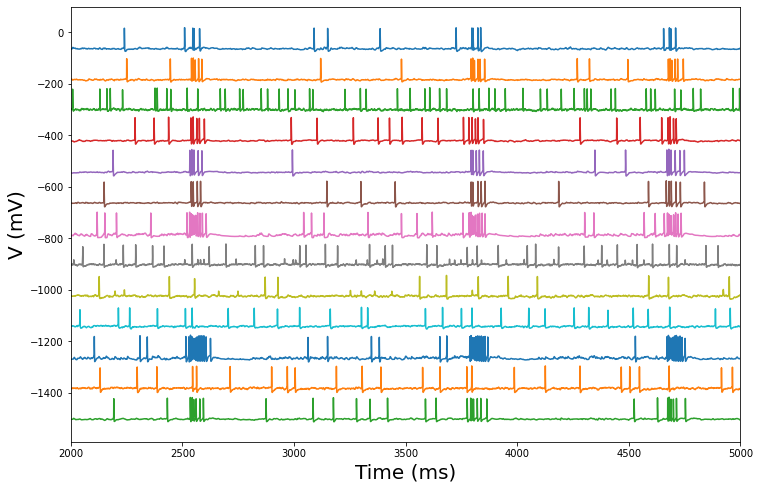

In [66]:
plt.figure(figsize=(12,8)) 
# time = np.linspace(0, 5000, 50000)
plt.ylabel('V (mV)', fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
# plt.xlim(170, 2670)
# plt.ylim(-80, -30)
# plt.ylim(-7390+6*120,20)
# popinvert = printVt[::-1]
# plt.yticks(np.arange(-7260+55*120,60,120),popinvert[0:6], fontsize=16)
# plt.xticks(np.arange(170,2671,500),np.arange(0,2501,500),fontsize=18)
# plt.xticks(np.arange(1000,2001,250),np.arange(1000,2001,250),fontsize=18)
plt.xlim(2000, 5000)

paramsName = paramsNameList[0]
number = 0
i2 = 0
for i,popName in enumerate(popParam[0:61]):     
    
    for metype in popLabelEl[popName]:
        
        if cellNumber[metype] < 5:
            numberME = cellNumber[metype]
        else:
            numberME = 5
            
        for j in range(numberME):    
            if popName in printVt:
                Vt = np.array(data[paramsName]['V_soma']['cell_'+str(cellVNumber[number])])
                if metype in recordStochKvCells and np.max(Vt[20000:25000])>0 and np.max(Vt[24500:25000])<0:
                    plt.plot(time, (Vt-i2*120.0)) 
                    i2+=1
            number = number + 1

#     if popName in printVt:
#         i2+=1
# plt.savefig('Vt_zoom_spontaneus_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

# S1_Thalamus

In [163]:
printVt = ['L1_NGC-DA','L1_SLAC','L23_LBC','L23_MC','L23_NGC','L4_DBC','L4_MC','L4_NGC','L4_SS','L4_SP','L5_MC','L5_TTPC1','L5_TTPC2','L5_UTPC','L6_IPC','L6_MC','L6_TPC_L1','L6_TPC_L4','L6_UTPC','VPL_sTC','VPM_sTC','POm_sTC_s1']
# ['L1_DAC','L1_DLAC','L1_HAC','L1_NGC-DA','L1_NGC-SA','L1_SLAC','L23_BP','L23_BTC','L23_ChC','L23_DBC','L23_LBC','L23_MC','L23_NBC','L23_NGC','L23_PC'
# ,'L23_SBC','L4_BP','L4_BTC','L4_ChC','L4_DBC','L4_LBC','L4_MC','L4_NBC','L4_NGC','L4_PC','L4_SBC','L4_SP','L4_SS',
# 'L5_BP','L5_BTC','L5_ChC','L5_DBC','L5_LBC','L5_MC','L5_NBC','L5_NGC','L5_SBC','L5_STPC','L5_TTPC1','L5_TTPC2','L5_UTPC',
# 'L6_BPC','L6_BP','L6_BTC','L6_ChC','L6_DBC','L6_IPC','L6_LBC','L6_MC','L6_NBC','L6_NGC','L6_SBC','L6_TPC_L1','L6_TPC_L4','L6_UTPC','ss_RTN_o','ss_RTN_m','ss_RTN_i','VPL_sTC','VPM_sTC','POm_sTC_s1'

In [182]:
printVt = ['L1_DAC','L1_DLAC','L1_HAC','L1_NGC-DA','L1_NGC-SA','L1_SLAC','L23_BP','L23_BTC','L23_ChC','L23_DBC','L23_LBC','L23_MC','L23_NBC','L23_NGC','L23_PC'
,'L23_SBC','L4_BP','L4_BTC','L4_ChC','L4_DBC','L4_LBC','L4_MC','L4_NBC','L4_NGC','L4_PC','L4_SBC','L4_SP','L4_SS',
'L5_BP','L5_BTC','L5_ChC','L5_DBC','L5_LBC','L5_MC','L5_NBC','L5_NGC','L5_SBC','L5_STPC','L5_TTPC1','L5_TTPC2','L5_UTPC',
'L6_BPC','L6_BP','L6_BTC','L6_ChC','L6_DBC','L6_IPC','L6_LBC','L6_MC','L6_NBC','L6_NGC','L6_SBC','L6_TPC_L1','L6_TPC_L4','L6_UTPC','ss_RTN_o',
           'ss_RTN_m','ss_RTN_i','VPL_sTC','VPM_sTC','POm_sTC_s1']

In [189]:
# plt.figure(figsize=(18,32)) 
# time = np.linspace(0, 5000, 50000)
# plt.ylabel('V (mV)', fontsize=20)
# plt.xlabel('Time (ms)', fontsize=20)
# plt.xlim(620, 1420)
# # plt.ylim(-80, -30)
# # plt.ylim(-7390+6*120,20)
# popinvert = printVt[::-1]
# plt.yticks(np.arange(-7260+0*120,60,120),popinvert[0:61], fontsize=18)
# plt.xticks(np.arange(620,1430,200),np.arange(400,1210,200),fontsize=18)

# paramsName = paramsNameList[1]
# number = 0
# i2 = 0
# for i,popName in enumerate(popParam[0:61]):   
#     for metype in popLabelEl[popName]:
        
#         if cellNumber[metype] < 5:
#             numberME = cellNumber[metype]
#         else:
#             numberME = 5
            
#         for j in range(numberME):    
#             Vt = np.array(data[paramsName]['V_soma']['cell_'+str(cellVNumber[number])])
#             plt.plot(time, (Vt-i*120.0)) 
#             number = number + 1

# plt.savefig('Vt_after-transient_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [188]:
# plt.figure(figsize=(18,24)) 
# time = np.linspace(0, 5000, 50000)
# plt.ylabel('V (mV)', fontsize=16)
# plt.xlabel('time (ms)', fontsize=16)
# plt.xlim(1680, 1780)
# # plt.ylim(-80, -30)
# plt.ylim(-7390+6*120,20)
# popinvert = popParam[::-1]
# plt.yticks(np.arange(-7260+6*120,60,120),popinvert[6:61], fontsize=14)
# plt.xticks(fontsize=14)

# paramsName = paramsNameList[0]
# number = 0
# for i,popName in enumerate(popParam[0:55]):   
#     for metype in popLabelEl[popName]:
        
#         if cellNumber[metype] < 5:
#             numberME = cellNumber[metype]
#         else:
#             numberME = 5
            
#         for j in range(numberME):    
#             Vt = np.array(data[paramsName]['V_soma']['cell_'+str(cellVNumber[number])])
#             if popName in Epops:
#                 plt.plot(time, (Vt-i*120.0),'r') 
#             else:
#                 plt.plot(time, (Vt-i*120.0),'c') 
#             number = number + 1

# plt.savefig('Vt_after-transient_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [187]:
# plt.figure(figsize=(24,5)) 

# plt.ylabel('L6', fontsize=32)
# plt.xlabel('time (ms)', fontsize=32)
# plt.xlim(1680, 1770)
# plt.ylim(31346, 18632)
# plt.yticks([18632,31346], fontsize=32)
# plt.xticks([1700,1750],[1700,1750],fontsize=32)
# plt.plot(data[paramsName]['spkt'],data[paramsName]['spkid'], 'r.')



# plt.savefig('Raster_zoom_L6_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [186]:
# plt.figure(figsize=(36,24)) 
# time = np.linspace(0, 5000, 50000)
# plt.ylabel('V (mV)', fontsize=16)
# plt.xlabel('time (ms)', fontsize=16)
# plt.xlim(0, 5000)
# # plt.ylim(-80, -30)
# plt.ylim(-7390+6*120,20)
# popinvert = popParam[::-1]
# plt.yticks(np.arange(-7260+6*120,60,120),popinvert[6:61], fontsize=14)
# plt.xticks(fontsize=14)

# paramsName = paramsNameList[1]
# number = 0
# i2 = 0
# for i,popName in enumerate(popParam[0:55]):   
#     for metype in popLabelEl[popName]:
        
#         if cellNumber[metype] < 5:
#             numberME = cellNumber[metype]
#         else:
#             numberME = 5
            
#         for j in range(numberME):    
#             Vt = np.array(data[paramsName]['V_soma']['cell_'+str(cellVNumber[number])])
#             plt.plot(time, (Vt-i*120.0)) 
#             number = number + 1

# plt.savefig('Vt_after-transient_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)